<a href="https://colab.research.google.com/github/DavidSenseman/STA1403/blob/master/Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **STA1403: "Biostats"**

### **Assignment 5: Estimation**

#### In this assignment you will learn about:

* Parameter Estimation
* Sampling
* Probability Density Functions (PDFs)
* Sampling Distributions
* Confidence Intervals
* Probability Mass Functions (PMFs)
* The Central Limit Theorem (CLT)

### Google CoLab Instructions

The following code will map your GDrive to ```/content/drive``` and print out your Google GMAIL address.

In [1]:
# You must run this cell second
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


## **Parameter Estimation**

Very often we are specifically interested in population mean and population variance of a random variable. These quantities are unknown in general. We
refer to these unknown quantities as **parameters**. Here, we use parameters μ and σ<sup>2</sup> to denote the unknown population mean and variance respectively. Note that for all the distributions we discussed in the previous chapter, the population mean and variance of a random variable are related to the unknown parameters of probability distribution assumed for that random variable. Indeed, for normal distributions _N_(μ,σ<sup>2</sup>), which are widely used in statistics, the population mean and variance are exactly the same parameters used to specify the distribution.

In this Aasignment, we discuss statistical methods for parameter **estimation**. Estimation refers to the process of guessing the unknown value of a parameter (e.g., population mean) using the observed data. For this, we will use an **estimator**, which is a **statistic**. A statistic is a function of the observed data only. That is, it does not depend on any unknown parameter, and given the observed data, we should be able to find its value. For example, the **_sample_mean_** is the statistic that is used to estimate the **_population_mean_**. Given a sample of data, we can find the sample mean by adding the observed values and dividing the result by the sample size. No unknown parameter is involved in this process.

## **Sampling Distribution**

As we have previously emphasized, the value of estimators discussed so far (and all estimators in general) depend on the specific sample selected from the population. Indeed, if we repeat our sampling, we are likely to obtain a different value for an estimator. Therefore, we regard the estimators themselves as random variables. As a result, similar to any other random variable, we can talk about their probability distribution. Probability distributions for estimators are called **sampling distributions**. In this section, we focus on the sampling distribution of the sample mean $ \overline{X} $ .


### Example 1: Compute and plot a PDF

The cell below shows Python code that can be used to generate a normal distribution with a mean = 125 and a standard deviation = 15. 

The comments before each step provides a brief discription of what the code is doing. 

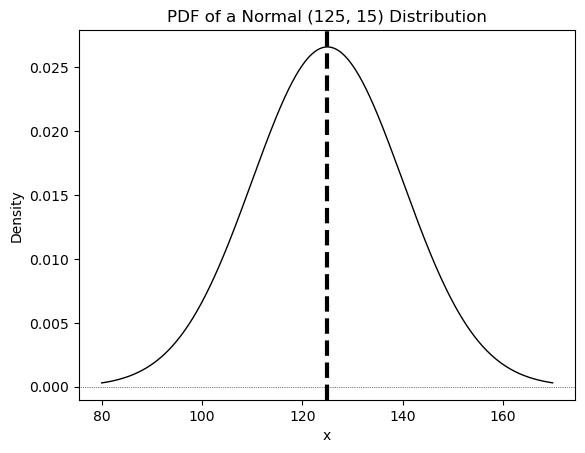

In [2]:
# Example 1: Compute and Plot a PDF

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define variables
mu = 125   # mean
sd = 15    # standard deviation

# Generate a series of evenly spaced values of x,
# starting at the mean minus 3 standard deviations
# and ending at the mean plus 3 standard deviations
x = np.arange(mu - 3 * sd, mu + 3 * sd, 0.1)

# Generate a y value for each x value using the normal distribution
y = norm.pdf(x, mu, sd)

# Plot the x/y pairs
plt.plot(x, y, color='black', linewidth=1.0)
plt.title("PDF of a Normal (125, 15) Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.axvline(x=125, linestyle="--", linewidth=3, color="black")  # Vertical line at mean
plt.axhline(y=0,linestyle='dotted', linewidth=0.5, color='black') # Horizontal line

# Show plot
plt.show()

The bell-shape figure above represents the Probability Density Function (PDF) of a variable _X_ ~ _N_(125,15). It is the Python equivalent of figure shown in the _Left Panel_ of Fig 6.3 on page 157 of your textbook. 

### **Exercise 1: Compute and plot a PDF**

In the cell below, write the Python code to generate and plot a Probability Density Function (PDF) for a normal distribution with a mean = 80 and a standard deviation = 10. 

(HINT: Don't forget to move the location of the vertical line so that it passes through the mean = 80. You will also need to change the main title for your plot). 

In [3]:
# Insert your code for Exercise 1 here 



If your code for Exercise 1 is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A05/A05_Image_00.png)

### Example 2: Create and plot a _Sampling Distribution_

The cell below shows the Python code to generate a **sampling distribution** with 1000 samples for X ~ Normal (125,15). 

The code begins with the command `set.seed(1403)`. This command is useful--but not mandatory--in programs that involve generating random numbers. By "setting the seed", the random number generator will always generate the same number when it starts. The _argument_ (i.e. the value in the parenthesis) can be any number. In this class we will simply use the course number `1403`.

The next lines of code assign values to the variables for our normal distribution. The variable `mu` will be used to represent the mean or average value in our normal distribution. In this example, the mean is set to 125. Python has a number of _reserved words_ that should not be used as variable names. It turns out that the word `mean` is a reserved word in Python. Python has a function called `mean()`, so giving this same name to our variable representing the mean could cause problems. Therefore we have used the word `mu` to represent the Greek symbol for the mean, μ. 

To generate a normal distribution, we need one more number besides the mean, the standard deviation, σ. The word `sd` is not a reserved word, so we can create a variable called `sd` to represent the standard deviation and assigned it a value of 15. 

The next lines of code define the variables needed to generate our sampling distribution. We will use a variable called `numValues` to specify how many randon numbers will be used in each sample. In this example, `numValues` is set to 100. We also need a variable called `numMeans` to specify the total number of samples we want to include in our sample distribution. In this example, `numMeans` is set to 1000.

We then use the Numpy function `np.array()` to _initialize_ an empty array called `NormalSampleMeans` which will fill next.   

After the our array has been initialized, we can start to add new mean values to it using an Python _control structure_ called a `for loop` . This loop is used to generate a series of random numbers using the function `np.random.normal()`. 

Each pass through the loop, function `np.random.normal()` generates 100 random numbers from a normal distribution with the specified mean and standard deviation and stores these numbers in a variable called `ranNumbers`. Since we are creating a _sampling distribution_ we only want the mean or average of these 100 random numbers. This is done in the next line in the loop with the command `newMean = np.mean(ranNumbers)`. 

The last line in the loop adds (_appends_) the value in `newMean` to our `NormalSampleMeans` array using Python's `np.append()` function, at which point the loop restarts and goes through the same process again. 

Each time the loop executes, a new mean value is added to our `NormalSampleMeans` array. The loop continues until the number of loops is equal to `numMeans` or 1000 in this example. 

Once the array has finished its calculations and generated our array of sample means, the only thing left to do is plot it out using Python's Matplotlib `plt.hist()` function so we can see (visualize) the distribution of mean values in our sampling distribution. 

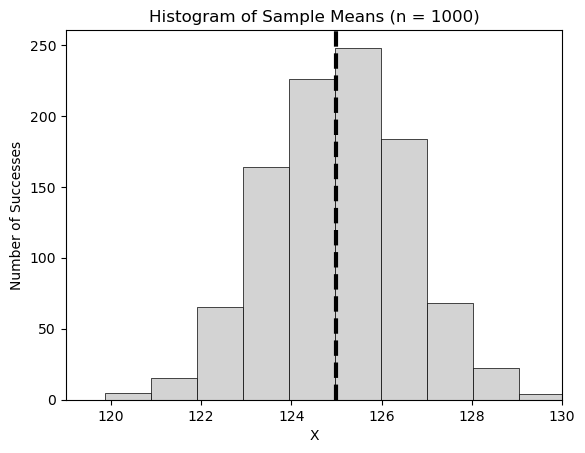

In [4]:
# Example 2: Plot histogram of Sampline Distribution

import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(1403)

# Define variables for the normal distribution
mu = 125  # mean
sd = 15   # standard deviation

# Assign variables for the sampling distribution
numValues = 100  # number of values in one sample
numMeans = 1000  # number of sample means to collect

# Initialize an array to hold the normal sample means
NormalSampleMeans = np.array([mu])

# Use a loop to compute 1000 sample means
for _ in range(numMeans):
    ranNumbers = np.random.normal(mu, sd, numValues)
    newMean = np.mean(ranNumbers)
    NormalSampleMeans = np.append(NormalSampleMeans, newMean)

# Generate a histogram of the sample means
plt.hist(NormalSampleMeans, bins=10, 
         color='lightgray',
         edgecolor='black',
         linewidth= 0.5)
plt.title("Histogram of Sample Means (n = 1000)")
plt.xlim(119,130)
plt.xlabel("X")
plt.ylabel("Number of Successes")
plt.axvline(x=125, linestyle='dashed', linewidth=3, color='black')  # Vertical line at mean
plt.box(on=True)
plt.show()

If the code is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A05/A05_Image_001.png)

Since we are using a _random number generator_ to create our samples, the shape of this histogram will change somewhat every time the cell is run. Nevertheless, the overall shape this histogram will always resemble a normal distribution according to the **_Central Limit Theorem (CLT)_**. The CLT _guarantees_ that any sampling distribution will approximate a normal distribution provided the number of samples is relatively large (>30) and the samples are independent and identically distributed (iid). 

This particular figure is similar to the histogram shown on the right of Fig. 6.2 in your textbook on page 157.

### **Exercise 2: Create and plot a _Sampling Distribution**

In the cell below write the Python code to generate and plot a **sampling distribution** with 2000 samples for X ~ Normal (80,10). Each sample should contain only 50 values instead of the 100 values in Example 1. You should set the x limits on your histogram to be from 74 and 86. Since the mean is different from the one used in Example 1, you will also have to adjust the position of the dashed vertical line as well as your main title.

In [5]:
# Insert your code for Exercise 2 here



If your code for Exercise 2 is correct, you should see the following image.

![_](https://biologicslab.co/STA1403/images/A05/A05_Image_002.png)

## **Confidence Intervals for the Population Mean**

It is common to express our point estimate along with its standard deviation to show how much the estimate could vary if different members of population were selected as our sample. Alternatively, we can use the point estimate and its standard deviation to express our estimate as a range (interval) of possible values for the unknown
parameter.

Consider the estimation of the population mean $ μ $in the systolic blood pressure example. We know that $ \overline{X}∼ N(μ, σ^2/n)$. Since the sampling distribution is normal, the 68–95–99.7% rule applies. Therefore, approximately 95% of the values of $ \overline{X} $ fall within the 2 standard deviations of the mean. We assumed that the variance of $ X $ is $ σ^2 = 15^2 $ and sample size is $ n = 100$. The standard deviation of $ \overline{X} $ is therefore $ \sqrt{n} = 1.5 $. Following the 68–95–99.7% rule, with 0.95 probability, the value of $ \overline{X} $ is within 2 standard deviations from its mean, $μ $,
                                    $$μ−2×1.5 ≤ \overline{X} ≤ μ+2×1.5.$$

The sample mean $ \overline{X} $ is itself a random variable and changes from one sample to another. Therefore, the above interval is not fixed. With every new sample, we have a new value for  $ \overline{X} $, and as the result, we have a new interval. Theoretically, we could repeatedly sample $ n = 100 $ people, find the sample mean, and determine the interval. Then, the true population mean μ would fall within these intervals with probability 0.95.

Suppose, for example, that we repeated this process twenty times to obtain twenty such intervals, as shown in the figure below. In this figure, each sample mean is shown as a circle and the true (but unknown) population mean $ μ = 125 $ as the dashed vertical line. Of twenty intervals, nineteen (i.e., 95%) include (cover) the true mean.

<img src="image.png">



## **Confidence Interval When the Population Variance is Unknown**

So far, we have assumed the population variance, $ σ^2 $, of the random variable is known. Hence, we assumed that $ σ / \sqrt{n} $, i.e., the standard deviation of the sample mean, is known. **This is an unrealistic assumption**. Almost always, we need to estimate $ σ^2 $ along with the population mean $ μ $. For this, we use our sample of $ n $ observations to obtain the sample variance $ s^2 $ and sample standard deviation $ s $ . As a result, the standard deviation for $ \overline{X} $ is estimated to be $ s/\sqrt{n} $. We refer to $s / \sqrt{n} $ as the **standard error** of the sample mean $ \overline{X} $ to distinguish it from $ σ/\sqrt{n} $. In general, we refer to the standard deviation of an estimator (e.g., $ \overline{X} $) as its standard error if we  have to use the data to estimate it. We use $ SE $ to denote the standard error of an estimator.

To find confidence intervals for the population mean when the population variance is unknown, we follow similar steps as described above, but instead of $ σ/\sqrt{n} $ we use $ SE = s/\sqrt{n} $, and instead of $ z_{crit} $ based on the standard normal distribution, we use tcrit obtained from a t -distribution with n − 1 degrees of freedom. The confidence interval for the population mean at c confidence level is

$$ \overline{x} −t_{crit} × s/\sqrt{n}, \overline{x} + t_{crit} × s/\sqrt{n} $$ 

where $ t_{crit} $ is the value with an upper tail probability of $ (1 − c)/2 $ based on a t-distribution with $ n−1 $ degrees of freedom.

## **Using Central Limit Theorem for Confidence Interval**

So far, we have assumed that the random variable has normal distribution, so the sampling distribution of  $ \overline{X} $ is normal too. If the random variable is not normally distributed, the sampling distribution of  $ \overline{X} $ is still approximately normal as long as the sample size is large. The larger the sample size, the better the approximation. This concept is known as the **central limit theorem (CLT)** in statistics.

The CLT is applicable regardless of the random variable’s distribution. Therefore, even if the random variable has other distributions such as Bernoulli, binomial, or Poisson, the sampling distribution of its mean will be approximately normal and will be centered on the true population mean if the sample size is large.

For example, suppose that we are investigating the number of physician visits per year. Further, suppose that the true but unknown population mean (rate) is $ μ = 2.5 $. For illustrative purposes, we assume that the random variable has a $ Poisson (2.5) $ distribution. The PMF of this distribution will be generated below.

### Example 3: Probability Mass Function (PMF) for a Poisson distribution

The cell below shows the Python code to generate the PMF for a Poisson (λ) distribution where `lambda`, λ, is equal to 2.5. For example, suppose people visit their physcian on average 2.5 times a year (`λ = 2.5`). We can use the Poisson Probility Mass Function (PMF) to predict the probability that some people will not go at all (`x` = 0), the probability that go only going 1 time (`x` = 1), the probabilty that they go 2 times (`x` = 2) in a year, and so forth.     

As before, we start by setting the seed of the random number generator to our class number `1403`. We then create a variable called `maxX` which is the number of intervals we want to see on our graph. In this case `maxX` is set to maximum of 10 visits in a year. As long as you don't make this value too small, the value you pick isn't very important. The important variable is λ, the average rate of "success". In this example we have created a variable called `lambda_value` to represent λ. Actually, λ is the **_only_** parameter needed to specify a Poisson distribution.  

The next line of code, `x = np.arange(0, np.minimum(rv.dist.b, numTrials))`, creates a sequence of `x` values from `0` to `maxX`.  

To generate the Probability Mass Function (PMF) for a Poisson distribution, we need to generate a random variable which we will call `rv` . We give `rv` a Poisson distribution with a specified λ with the command `rv=poisson(lambda_val)`.  

The last part of the Python code creates a histogram using the Matplotlib function `plt.plot()`.  This method was chosen to recreate the _Left Panel_ of Figure 6.6 in your textbook on page 164. Each `x` value is specified using our random variable `rv.pmf(x)`. The line `plt.plot(rv.pmf(x), 'ko', ms=3)` draws a filled black circle (the "k" in `ko` means "black" while the "o" means a circle) at the x- and y- co:ordinates specified by `rv.pmf(x)`. 

Immediately after plotting the histogram, we have used Matplotlib's `plt.vlines()` function to draw a vertical line to each "circle" to make this figure match the one in your textbook. Finally, we used Matplotlib's `hlines()` function to draw a horizontal line at the bottom of the histogram to complete the figure.


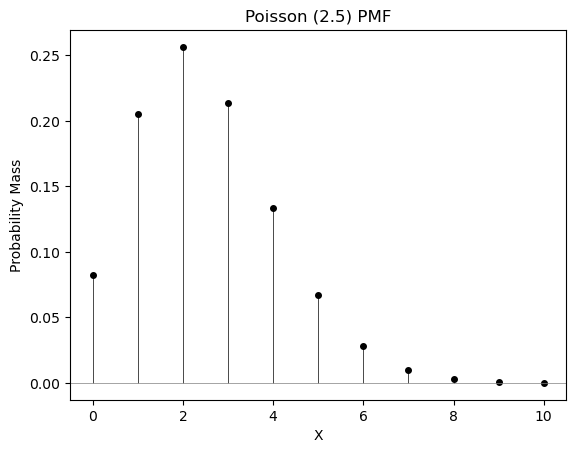

In [6]:
# Example 3: Probability Mass Function (PMF)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Set random seed
np.random.seed(1403)

# Define variables
maxX = 10  # maximal number of x-axis values
lambda_val = 2.5  # mean interval of successes on the interval

# Create a sequence of x values from 0 to maxX
x = np.arange(maxX + 1)

# Compute the probability of getting a certain number of successes for each x
rv = poisson(lambda_val) 

# Generate a histogram of the sample means
plt.vlines(x, 0, rv.pmf(x), 
        color='black',
        linestyle='solid',
        linewidth=0.5)
# Plot the balls at the top of each line
plt.plot(rv.pmf(x), 'ko', ms=4)
plt.title("Poisson (2.5) PMF")
plt.xlabel("X")
plt.ylabel("Probability Mass")
plt.axhline(y=0, color='gray', linestyle='solid', linewidth=0.5)
plt.show()

If the code is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A05/A05_Image_01.png)

You should note that the Probability Mass Function (PMF) for the Poisson Distribution does **not** resemble a normal distribution. Unlike a normal distribution, the Poisson distribution is neither "bell-shaped" nor is it symmetrical about the left/right axis. 

### **Exercise 3: Probability Mass Function (PMF) for a Poisson distribution**

In the cell below, write the Python code to generate the PMF for a Poisson (λ) distribution where λ is equal to 10. Set the seed of the random number generator to our class number `1403`. To see all of your new Poisson (λ) PMF, you will need to increase the value of `maxX` to 30. And don't forget to change the title of your histogram. 


In [7]:
# Insert your code for Exercise 3 here



If your code for Exercise 3 is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A05/A05_Image_02.png)

### Example 4: _Sampling Distribution_ for a Poisson Distribution (2.5)

The cell below shows how to create a sampling distribution for Poisson (λ) distribution with λ = 2.5. This code uses the Numpy function `np.random.poisson()` to generate 200 random numbers (`numValues = 200`) according to a Poisson distribution with the specified value for λ. 

As before, Numpy's `np.mean()` function is used to find the mean of these 200 randon numbers and store the average value in an array called `poisson_sample_means`. After the sampling distribution has been generated, it is plotted as a histogram using Matplotlib's `plt.hist()` function to show the distribution of values.  

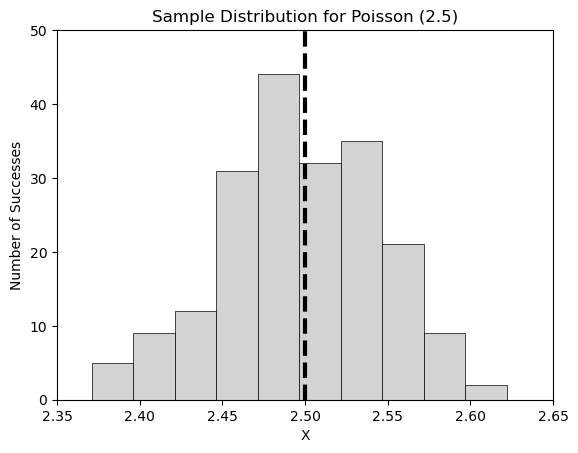

In [8]:
# Example 4: Poisson Sampling Distribution

import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(1403)

# Parameters
lambda_val = 2.5
num_values = 200
num_means = 1000

# Initialize array to hold sample means
poisson_sample_means = np.array([])

# Compute sample mean 1000 times
for _ in range(num_values):
    ran_numbers = np.random.poisson(lambda_val, num_means)
    new_mean = np.mean(ran_numbers)
    poisson_sample_means = np.append(poisson_sample_means, new_mean)

# Generate a histogram of the sample means
plt.hist(poisson_sample_means, bins=10, 
         color='lightgray',
         edgecolor='black',
         linewidth= 0.5)
plt.title("Sample Distribution for Poisson (2.5)")
plt.xlabel("X")
plt.ylabel("Number of Successes")
plt.xlim(2.35, 2.65)
plt.ylim(0, 50)

# Draw a vertical line at the mean
plt.axvline(x=lambda_val, linestyle='dashed', linewidth=3, color='black')

# Draw a box around the graph
plt.box(on=True)

# Show the plot
plt.show()

If the code is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A05/A05_Image_03.png)

Once again, you should notice that the distribution of the values in the Sample Distribution has the approximate bell-shape of a normal distribution.

### **Exercise 4: _Sampling Distribution_ for a Poisson(10)**

In the cell below, write the Python code to generate a sampling distribution for a Poisson distribution with λ = 10. Set the number of values in each interval to 500 and the number of sample means to 1000. When plotting your histogram, use Matplotlib's `plt.hist()` function with the number of `bins` set to 12, the x-axis limits set between 9.7 and 10.3, and the y-axis limits set between 0 and 120. Finally, don't forget to change the main title.  

In [9]:
# Insert your code for Exercise 4 here



If your code for Exercise 4 is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A05/A05_Image_04.png)

### Example 5: Creating Plots Side-by-Side

When generating figures for publication, it is very common to group two (or more) graphs together. In Python, this can be accomplished with the `Axes` class. 

In Matplotlib, the `Axes` class represents a single (sub-)plot within a figure. It encapsulates all the elements of an individual plot, including the plotted data, axis ticks, labels, title, legend, and more1. Here are some key methods and functionalities provided by the Axes class:

* **Plotting Methods:**</br>
_plot(x, y):_ Plot data points as lines and/or markers.</br>
_scatter(x, y):_ Create a scatter plot.</br>
_bar(x, height) and barh(y, width):_ Make bar plots (vertical and horizontal).</br>
errorbar(x, y, yerr): Plot data with attached error bars.</br>

* **Spans and Annotations:**</br>
_axhline(y) and axvline(x):_ Add horizontal and vertical lines across the axes.</br>
_axhspan(ymin, ymax) and axvspan(xmin, xmax):_ Add horizontal and vertical spans (rectangles) across the axes.</br>

* **Statistics and Spectral Plots:**</br>
_hist(x):_ Compute and plot a histogram.</br>
_psd(x):_ Plot the power spectral density.</br>
_specgram(x):_ Plot a spectrogram.</br>

* **Axis Properties:**
_set_xlim(left, right) and set_ylim(bottom, top):_ Set axis limits.</br>
_set_xlabel(label), set_ylabel(label), and set_title(title):_ Customize axis labels and plot title.</br>

The Python code in the cell below uses the `Axes` class two generate two separate plots that are side-by-side.  

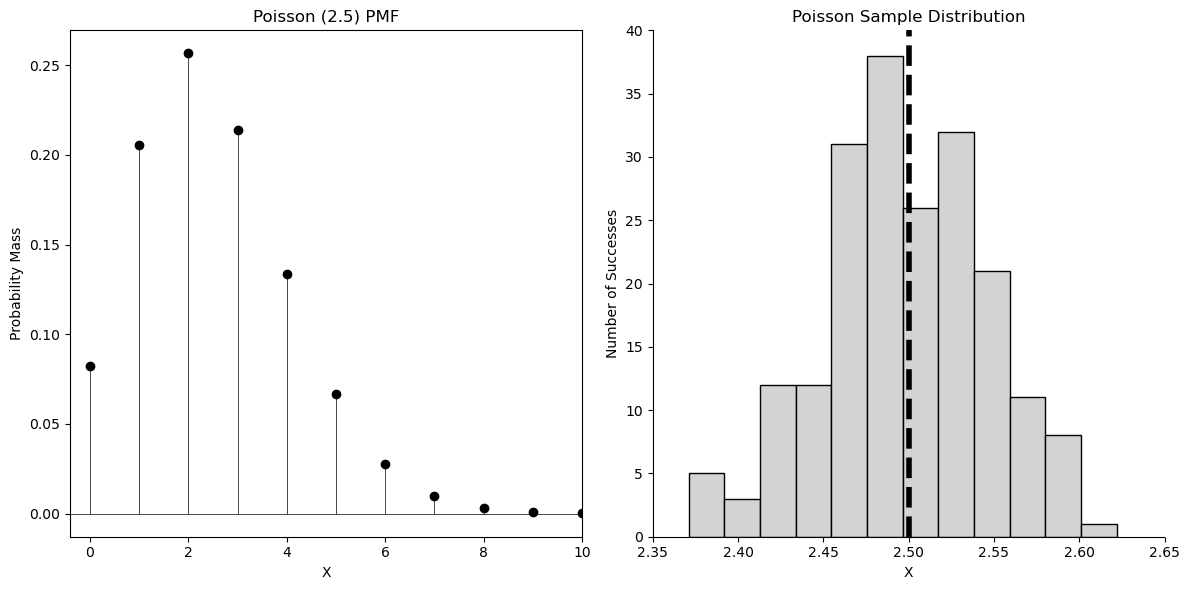

In [10]:
# Example 5: Plot two graphs side-by-side

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Set random seed
np.random.seed(1403)

# Assign values for PMF plot
maxX = 10
lambda_val = 2.5

# Create a sequence of x values from 0 to maxX
x = np.arange(maxX + 1)

# Compute the probability of getting a certain number of successes for each x
Poisson_data = poisson.pmf(x, lambda_val)

# Assign values for Poisson Sampling Distribution
lambda_val = 2.5
numValues = 200
numMeans = 1000

# Initialize array to hold the sample means
PoissonSampleMeans = np.array([])

# Compute the sample mean 1000 times
for _ in range(numValues):
    ranNumbers = np.random.poisson(lambda_val, numMeans)
    newMean = np.mean(ranNumbers)
    PoissonSampleMeans = np.append(PoissonSampleMeans, newMean)

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Poisson PMF on the left
axs[0].plot(x, Poisson_data,'ko', 
            linewidth=0.5)
axs[0].vlines(x, Poisson_data, ymax=0.0,
              color='black',
              linewidth=0.5)
axs[0].set_xlim(-0.4, maxX)
axs[0].set_title("Poisson (2.5) PMF")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Probability Mass")
axs[0].axhline(y=0, color='black', 
               linestyle='-',
               linewidth=0.5)

# Plot Poisson Sample Distribution on the right
axs[1].hist(PoissonSampleMeans, bins=12, 
            color='lightgray', 
            edgecolor='black')
axs[1].set_xlim(2.35, 2.65)
axs[1].set_ylim(0, 40)
axs[1].set_title("Poisson Sample Distribution")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Number of Successes")
axs[1].axvline(x=lambda_val, 
               linestyle='dashed', 
               color='black',
               linewidth=4.0)

# Add a box around the second plot
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(True)
axs[1].spines['left'].set_visible(True)

plt.tight_layout()
plt.show()

If the code is correct, you should see the following image.

![__](https://biologicslab.co/STA1403/images/A05/A05_Image_05.png)

The pair of graphs above are the Python equivalent of **Fig. 6.6** in your textbook on page 164.

## **Importance of the CLT in Biostatistics**

By visual inspection of these two graphs you can see an essential aspect of the **_Central Limit Theory (CLT)_** as it is applied to biostatistics. Even though a Poisson's Probability Mass Function (shown on the left) is neither "bell-shaped" nor symmetrical left-to-right, its _sampling distribution_ , shown on the right, is approximately "bell-shaped" and symmetrical around the mean. In other words, because of the **CLT**, the _Sampling Distribution_ of any random variable is approximately **normally distributed**. 

It turns out that the CLT is applicable to essentially **_ALL_** distributions of random variables (assuming certain restrictions are met) whether the randon variable has a normal distribution, a binomial distribution, a Poisson Distribution, or any number of other distributions. As you will see later, this has very significant impact on how we can _trust_ our estimates of random variables to be very close to the actual value, even though we usually can't verify this to be true. 

### **Lesson Turn-In**

When you have completed all of the exercises and run **every** cell in this Lesson, print out a PDF copy and upload it to Canvas. Your PDF should be called `Assignment_05_lastname.pdf` where _Lastname_ is your last name.